<a href="https://colab.research.google.com/github/GiorgiaVitanza/DataScience/blob/master/ai_bootcamp_unsupervised_algorithms_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Algorithms Homework

In this homework assignment, you will apply three fundamental machine learning algorithms to famous datasets:
1. **K-Means clustering**: Customer Segmentation with Retail Dataset
2. **Heirarchical clustering**:Wine Dataset Classification

### Instructions

- Implement **at least** one algorithm
- Complete each section carefully
- Add your code where indicated by `# YOUR CODE HERE`
- Provide comments explaining your approach

In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Set random seed for reproducibility
np.random.seed(42)

## Part 1: K-Means Clustering - Customer Segmentation

#### Tasks
1. Load and preprocess the dataset
2. Perform feature engineering
3. Apply K-Means clustering
4. Visualize and interpret customer segments

In [7]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

retail_data = pd.read_excel('OnlineRetail.xlsx', engine='openpyxl')
retail_data.head()

Saving OnlineRetail.xlsx to OnlineRetail.xlsx


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# TODO: Data Preprocessing
# 1. Remove rows with missing values
# 2. Remove negative quantities and zero prices
# 3. Use only Quantity and UnitPrice for the clustering

# YOUR CODE HERE:
retail_data.dropna(inplace=True)
retail_data = retail_data[retail_data['Quantity'] > 0]
retail_data = retail_data[retail_data['UnitPrice'] > 0]
retail_data_select = retail_data[['Quantity', 'UnitPrice']]

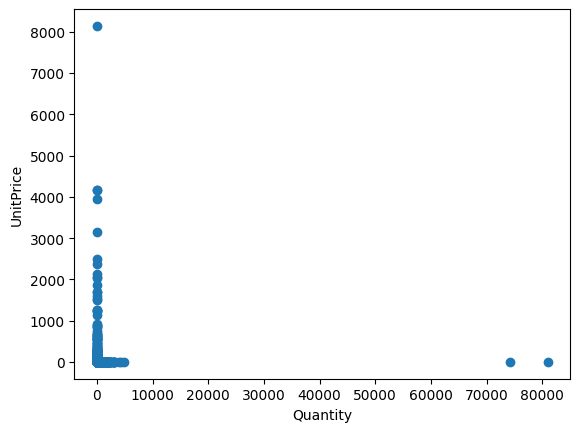

In [11]:
# TODO: Visualise points of dataset

# YOUR CODE HERE:
plt.scatter(retail_data_select['Quantity'], retail_data_select['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

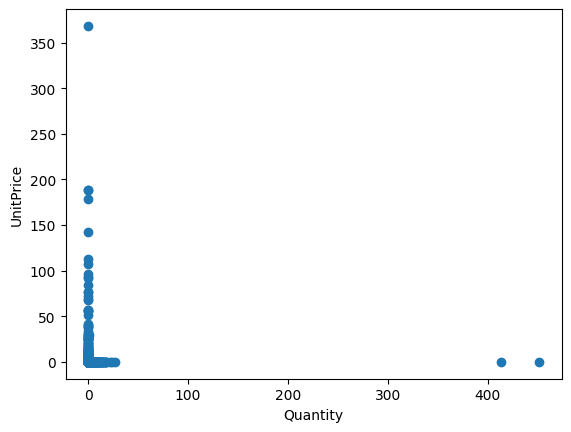

In [15]:
# TODO: Scale the features

# YOUR CODE HERE:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(retail_data_select)

plt.scatter(scaled_data[:,0], scaled_data[:,1])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

At first sight I can see two clusters, therefore I will set n_clusters = 2.

In [16]:
# TODO: Perform K-Means Clustering

# YOUR CODE HERE:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

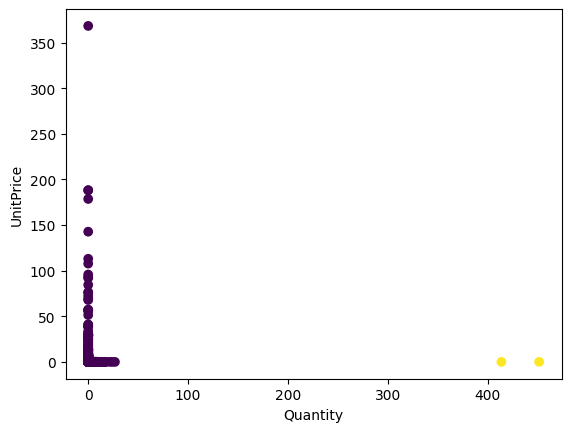

In [17]:
# TODO: Visualise dataset with assign clusters

# YOUR CODE HERE:
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In order to be sure about the choice of our number of clusters, one can use the elbow method to establish it in a more accurate way.

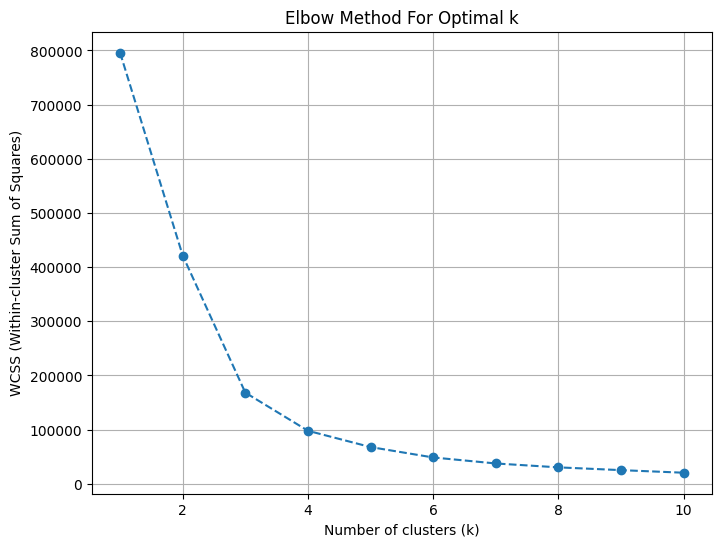

In [18]:
# Initialize an empty list to store the WCSS values
wcss = []

# Try different values of k (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS value

# Plot the WCSS vs the number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

Observing this last plot, we can deduce that the best number of clusters is 4, because is the point in which the direction of the curve changes in a clear way (as an elbow). Then we could retry the K-means model with this new number of clusters.

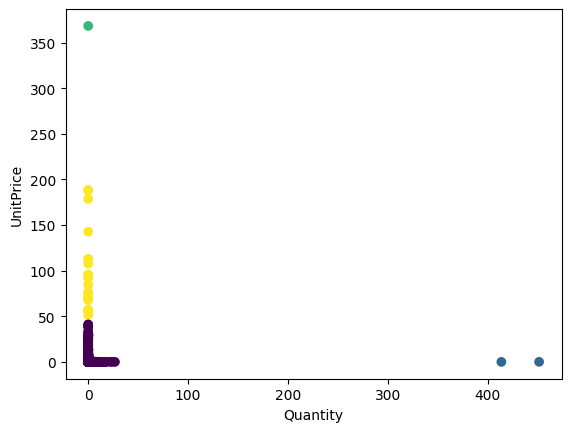

In [20]:
# TODO: Perform K-Means Clustering


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

# TODO: Visualise dataset with assign clusters

plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In this case I think that four clusters are too much, even if in this way we catch also the outlier. Then I think that 3 could be a good compromise between what I see at the beginning and what the elbow method suggests.

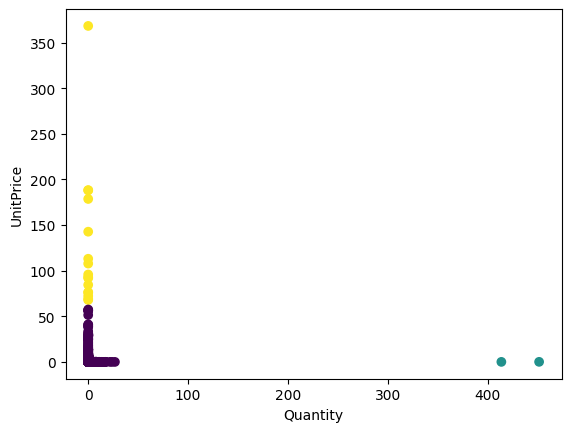

In [21]:
# TODO: Perform K-Means Clustering


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# TODO: Visualise dataset with assign clusters

plt.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

## Part 2: Hierarchical Clustering - Wine Dataset Classification

#### Tasks
1. Load Wine dataset
2. Preprocess and scale features
3. Perform Hierarchical Clustering
4. Visualize dendrogram and cluster results

In [22]:
# Load Wine Dataset

from sklearn.datasets import load_wine

wine = load_wine()
X_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

In [23]:
X_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
# TODO: Preprocess the data
# 1. Scale the features using StandardScaler
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)
# 2. Ensure no missing values
X_wine.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [29]:
# TODO: Compute linkage matrix for Hierarchical Clustering. Use different linkage methods. Try: 'ward', 'complete', 'average'

# YOUR CODE HERE:
linkage_matrix_w = linkage(X_wine_scaled, method='ward')
linkage_matrix_c = linkage(X_wine_scaled, method='complete')
linkage_matrix_a = linkage(X_wine_scaled, method='average')

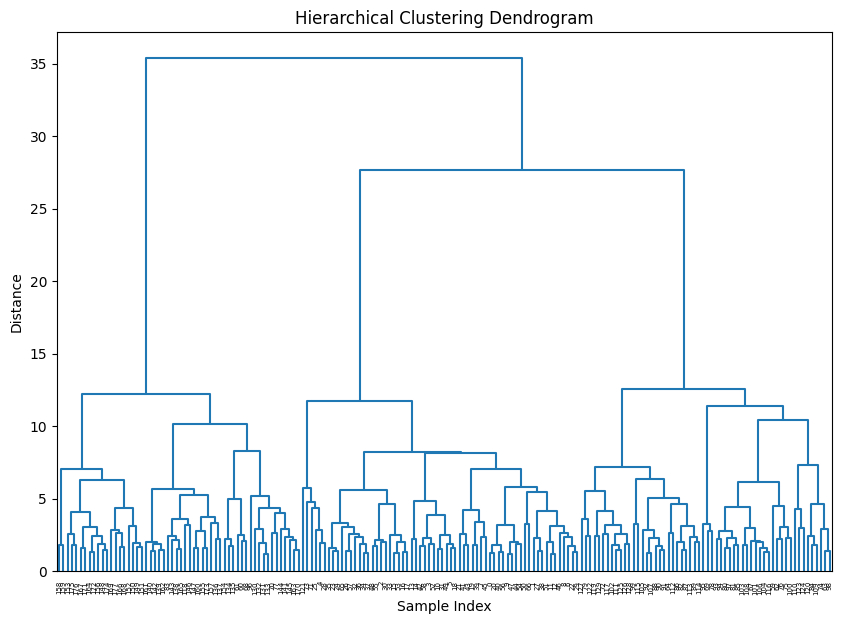

In [33]:
# TODO: Plot dendrogram

# YOUR CODE HERE:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_w, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

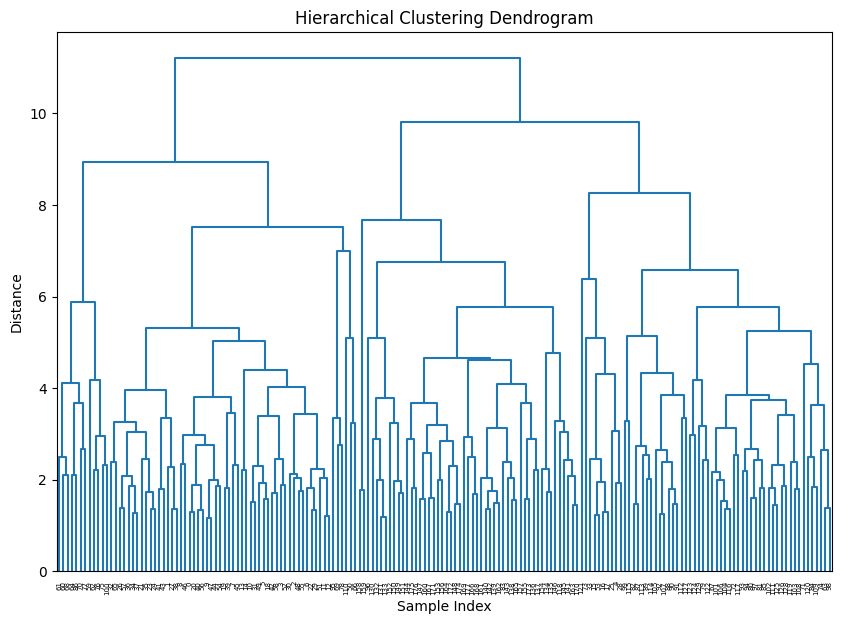

In [34]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_c, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

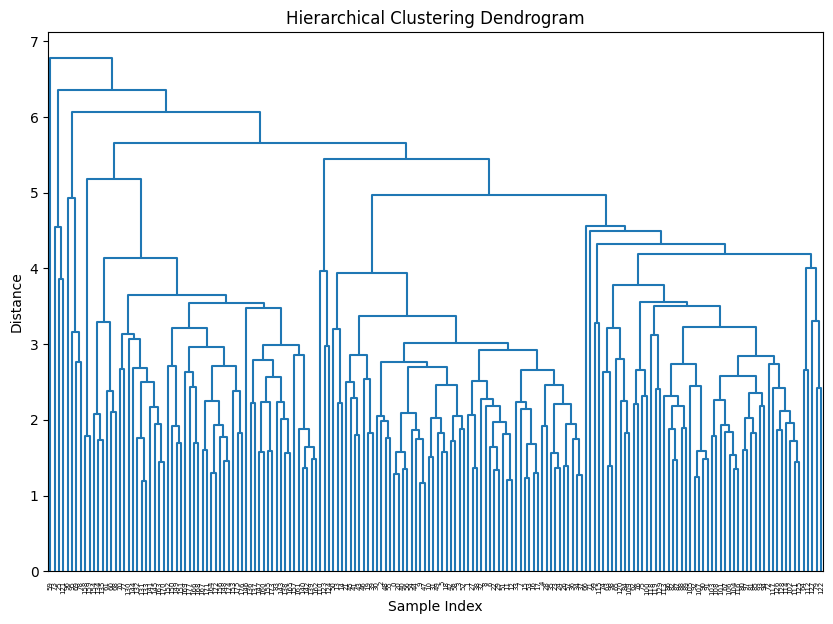

In [35]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_a, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [44]:
# TODO: Perform Hierarchical Clustering. Try different number of clusters: 2, 3 and 4 clusters.
# Visualization of Clustering Results on 2 variables on ypur choice.

# YOUR CODE HERE:
# Perform Hierarchical Clustering
hier_cluster = AgglomerativeClustering(n_clusters=2)
hier_labels = hier_cluster.fit_predict(X_wine_scaled[:,0:2])

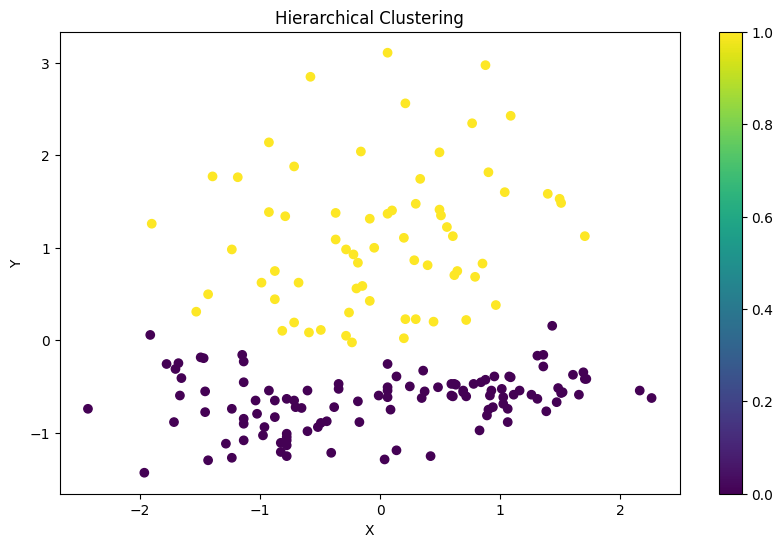

In [45]:
# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_scaled[:, 0], X_wine_scaled[:, 1], c=hier_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(scatter)
plt.show()

In [46]:
# TODO: Perform Hierarchical Clustering. Try different number of clusters: 2, 3 and 4 clusters.
# Visualization of Clustering Results on 2 variables on ypur choice.

# YOUR CODE HERE:
# Perform Hierarchical Clustering
hier_cluster = AgglomerativeClustering(n_clusters=3)
hier_labels = hier_cluster.fit_predict(X_wine_scaled[:,0:2])

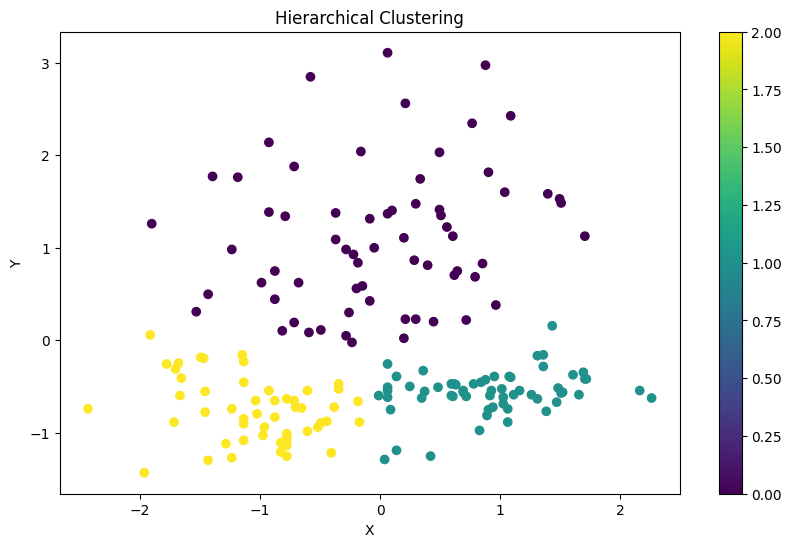

In [47]:
# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_scaled[:, 0], X_wine_scaled[:, 1], c=hier_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(scatter)
plt.show()

In [48]:
# TODO: Perform Hierarchical Clustering. Try different number of clusters: 2, 3 and 4 clusters.
# Visualization of Clustering Results on 2 variables on ypur choice.

# YOUR CODE HERE:
# Perform Hierarchical Clustering
hier_cluster = AgglomerativeClustering(n_clusters=4)
hier_labels = hier_cluster.fit_predict(X_wine_scaled[:,0:2])

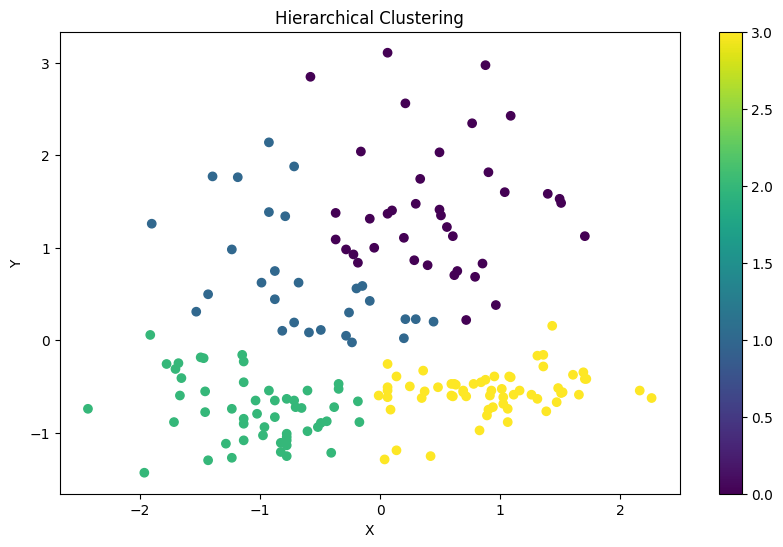

In [49]:
# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_wine_scaled[:, 0], X_wine_scaled[:, 1], c=hier_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(scatter)
plt.show()

For the last scatter plots I have used only the first two columns of the dataset in order to easier distinguish the different clusters. I think that the number of clusters equal to 3 is the best approach.